# **Import all the necessary libraries**

In [6]:
# Importing all the libraries necessary for this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io

# Contains a dictionary of encoding names and associated aliases
from encodings.aliases import aliases

%matplotlib inline

# **Read in the csv files and remove duplicates**

In [46]:
uploaded = files.upload()

alias_values = set(aliases.values())

for encoding in set(aliases.values()):
  try:
    df = pd.read_csv(io.BytesIO(uploaded['crime.csv']), nrows=10, encoding=encoding)
    print('successful', encoding)
  except:
    pass

Saving crime.csv to crime.csv
successful cp855
successful cp861
successful hp_roman8
successful latin_1
successful big5hkscs
successful cp273
successful cp852
successful iso8859_10
successful cp932
successful cp1252
successful iso8859_6
successful cp1140
successful cp775
successful iso8859_5
successful cp864
successful iso8859_15
successful iso8859_13
successful cp1253
successful cp866
successful cp1258
successful cp860
successful cp862
successful utf_16_le
successful cp1255
successful iso8859_9
successful iso8859_2
successful kz1048
successful cp850
successful iso8859_8
successful cp1026
successful cp1250
successful iso8859_11
successful cp863
successful cp865
successful iso8859_14
successful utf_16_be
successful cp1125
successful cp037
successful gbk
successful mac_iceland
successful iso8859_7
successful gb18030
successful cp1251
successful mac_greek
successful iso8859_3
successful mac_turkish
successful iso8859_16
successful mac_roman
successful ptcp154
successful mac_cyrillic
succe

In [8]:
crime = pd.read_csv(io.BytesIO(uploaded['crime.csv']), encoding = "iso8859_11")
crime.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [9]:
# Checking the shape of date
# 319073 rows and 17 columns
crime.shape

(319073, 17)

In [10]:
# Counting the duplicated rows
crime.duplicated().sum()

23

In [11]:
# Removing duplicates and checking shape again
# Removed 23 duplicated rows in total
crime.drop_duplicates(inplace = True)
crime.shape

(319050, 17)

# **Exploring the Dataset**

In [12]:
crime.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [13]:
crime.tail()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
319068,I050310906-00,3125,Warrant Arrests,WARRANT ARREST,D4,285,NaN,2016-06-05 17:25:00,2016,6,Sunday,17,Part Three,COVENTRY ST,42.336951,-71.085748,"(42.33695098, -71.08574813)"
319069,I030217815-08,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part One,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319070,I030217815-08,3125,Warrant Arrests,WARRANT ARREST,E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part Three,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319071,I010370257-00,3125,Warrant Arrests,WARRANT ARREST,E13,569,NaN,2016-05-31 19:35:00,2016,5,Tuesday,19,Part Three,NEW WASHINGTON ST,42.302333,-71.111565,"(42.30233307, -71.11156487)"
319072,142052550,3125,Warrant Arrests,WARRANT ARREST,D4,903,NaN,2015-06-22 00:12:00,2015,6,Monday,0,Part Three,WASHINGTON ST,42.333839,-71.080290,"(42.33383935, -71.08029038)"


In [14]:
# Changes the max amount of rows displayed (However, we will leave that commented)
#     #pd.options.display.max_rows = 10

crime

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319068,I050310906-00,3125,Warrant Arrests,WARRANT ARREST,D4,285,NaN,2016-06-05 17:25:00,2016,6,Sunday,17,Part Three,COVENTRY ST,42.336951,-71.085748,"(42.33695098, -71.08574813)"
319069,I030217815-08,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part One,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319070,I030217815-08,3125,Warrant Arrests,WARRANT ARREST,E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part Three,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319071,I010370257-00,3125,Warrant Arrests,WARRANT ARREST,E13,569,NaN,2016-05-31 19:35:00,2016,5,Tuesday,19,Part Three,NEW WASHINGTON ST,42.302333,-71.111565,"(42.30233307, -71.11156487)"


In [15]:
# Summary of the dataset

crime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 319050 entries, 0 to 319072
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   INCIDENT_NUMBER      319050 non-null  object 
 1   OFFENSE_CODE         319050 non-null  int64  
 2   OFFENSE_CODE_GROUP   319050 non-null  object 
 3   OFFENSE_DESCRIPTION  319050 non-null  object 
 4   DISTRICT             317285 non-null  object 
 5   REPORTING_AREA       319050 non-null  object 
 6   SHOOTING             1019 non-null    object 
 7   OCCURRED_ON_DATE     319050 non-null  object 
 8   YEAR                 319050 non-null  int64  
 9   MONTH                319050 non-null  int64  
 10  DAY_OF_WEEK          319050 non-null  object 
 11  HOUR                 319050 non-null  int64  
 12  UCR_PART             318960 non-null  object 
 13  STREET               308179 non-null  object 
 14  Lat                  299052 non-null  float64
 15  Long             

In [16]:
# Converting OCCURRED_ON_DATE into a Date type
# Will need to extract datetime info

crime.OCCURRED_ON_DATE= pd.to_datetime(crime.OCCURRED_ON_DATE)

# Data Check
# Should be "datetime64[ns] instead of object"

crime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 319050 entries, 0 to 319072
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   INCIDENT_NUMBER      319050 non-null  object        
 1   OFFENSE_CODE         319050 non-null  int64         
 2   OFFENSE_CODE_GROUP   319050 non-null  object        
 3   OFFENSE_DESCRIPTION  319050 non-null  object        
 4   DISTRICT             317285 non-null  object        
 5   REPORTING_AREA       319050 non-null  object        
 6   SHOOTING             1019 non-null    object        
 7   OCCURRED_ON_DATE     319050 non-null  datetime64[ns]
 8   YEAR                 319050 non-null  int64         
 9   MONTH                319050 non-null  int64         
 10  DAY_OF_WEEK          319050 non-null  object        
 11  HOUR                 319050 non-null  int64         
 12  UCR_PART             318960 non-null  object        
 13  STREET        

In [17]:
# Lets try it out!
crime.OCCURRED_ON_DATE.dt.minute


# crime.OCCURRED_ON_DATE.dt.year
# crime.OCCURRED_ON_DATE.dt.month
# crime.OCCURRED_ON_DATE.dt.week
# crime.OCCURRED_ON_DATE.dt.hour

0          0
1          0
2         27
3         16
4          5
          ..
319068    25
319069    38
319070    38
319071    35
319072    12
Name: OCCURRED_ON_DATE, Length: 319050, dtype: int64

In [18]:
# Summary info for numeric columns
crime.describe()

,OFFENSE_CODE,YEAR,MONTH,HOUR,Lat,Long
count,319050.000000,319050.000000,319050.000000,319050.000000,299052.000000,299052.000000
mean,2317.516957,2016.560674,6.609622,13.118176,42.214373,-70.908260
std,1185.308921,0.996312,3.273677,6.294258,2.159845,3.493746
min,111.000000,2015.000000,1.000000,0.000000,-1.000000,-71.178674
25%,1001.000000,2016.000000,4.000000,9.000000,42.297438,-71.097135
50%,2907.000000,2017.000000,7.000000,14.000000,42.325538,-71.077524
75%,3201.000000,2017.000000,9.000000,18.000000,42.348624,-71.062467
max,3831.000000,2018.000000,12.000000,23.000000,42.395042,-1.000000


In [19]:
# Summary info for NON-numeric columns
crime.describe(include = 'object')

,INCIDENT_NUMBER,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,DAY_OF_WEEK,UCR_PART,STREET,Location
count,319050,319050,319050,317285,319050,1019,319050,318960,308179,319050
unique,282517,67,244,12,879,1,7,4,4657,18194
top,I162030584,Motor Vehicle Accident Response,SICK/INJURED/MEDICAL - PERSON,B2,,Y,Friday,Part Three,WASHINGTON ST,"(0.00000000, 0.00000000)"
freq,13,37132,18783,49940,20250,1019,48489,158537,14192,19998


In [20]:
# Checking for columns that have missing values
crime.columns[np.sum(crime.isnull()) != 0]

Index(['DISTRICT', 'SHOOTING', 'UCR_PART', 'STREET', 'Lat', 'Long'], dtype='object')

In [21]:
# Checking for the number of unique values in each column
for col in crime.columns:
  unique_count = crime[col].nunique()
  print("Column " + col + " has " + str(unique_count) + " unique values.")

Column INCIDENT_NUMBER has 282517 unique values.
Column OFFENSE_CODE has 222 unique values.
Column OFFENSE_CODE_GROUP has 67 unique values.
Column OFFENSE_DESCRIPTION has 244 unique values.
Column DISTRICT has 12 unique values.
Column REPORTING_AREA has 879 unique values.
Column SHOOTING has 1 unique values.
Column OCCURRED_ON_DATE has 233229 unique values.
Column YEAR has 4 unique values.
Column MONTH has 12 unique values.
Column DAY_OF_WEEK has 7 unique values.
Column HOUR has 24 unique values.
Column UCR_PART has 4 unique values.
Column STREET has 4657 unique values.
Column Lat has 18178 unique values.
Column Long has 18178 unique values.
Column Location has 18194 unique values.


# **Answering Important Questions:**

# What are the most common crimes in terms of Offense Group?



In [22]:
# Grabbing the top 10 common crimes
offense_group_vals = crime.OFFENSE_CODE_GROUP.value_counts(ascending = False)[:10]
offense_group_vals

Motor Vehicle Accident Response    37132
Larceny                            25935
Medical Assistance                 23540
Investigate Person                 18749
Other                              18073
Drug Violation                     16545
Simple Assault                     15826
Vandalism                          15414
Verbal Disputes                    13099
Towed                              11287
Name: OFFENSE_CODE_GROUP, dtype: int64

Motor Vehicle Accident Response    0.116383
Larceny                            0.081288
Medical Assistance                 0.073782
Investigate Person                 0.058765
Other                              0.056646
Drug Violation                     0.051857
Simple Assault                     0.049604
Vandalism                          0.048312
Verbal Disputes                    0.041056
Towed                              0.035377
Name: OFFENSE_CODE_GROUP, dtype: float64

Text(0.5, 1.0, 'Top 10 Offense Groups in Percentages')

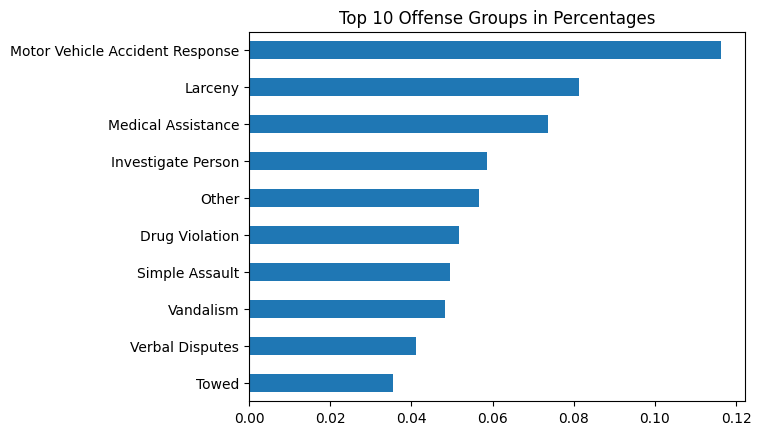

In [23]:
# Converting this into a percentage of the total amount of crimes
# Total amount of crimes
display((offense_group_vals / crime.shape[0]))

# Creating a horizontal bar chart of the data
(offense_group_vals / crime.shape[0]).sort_values().plot(kind = 'barh')
plt.title("Top 10 Offense Groups in Percentages")

# What are the least common Offense Groups?




In [25]:
crime.OFFENSE_CODE_GROUP.value_counts(ascending = True)[:10]

Burglary - No Property Taken                  2
Biological Threat                             2
HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE     2
INVESTIGATE PERSON                            4
HUMAN TRAFFICKING                             7
Gambling                                      8
Manslaughter                                  8
Explosives                                   27
Phone Call Complaints                        31
Aircraft                                     36
Name: OFFENSE_CODE_GROUP, dtype: int64

# What are the most common Offense Descriptions?

In [26]:
offense_desc_vals = crime.OFFENSE_DESCRIPTION.value_counts()[:10]
offense_desc_vals

SICK/INJURED/MEDICAL - PERSON            18783
INVESTIGATE PERSON                       18753
M/V - LEAVING SCENE - PROPERTY DAMAGE    16323
VANDALISM                                15153
ASSAULT SIMPLE - BATTERY                 14791
VERBAL DISPUTE                           13099
TOWED MOTOR VEHICLE                      11287
INVESTIGATE PROPERTY                     11124
LARCENY THEFT FROM BUILDING               9069
THREATS TO DO BODILY HARM                 9042
Name: OFFENSE_DESCRIPTION, dtype: int64

SICK/INJURED/MEDICAL - PERSON            0.058872
INVESTIGATE PERSON                       0.058778
M/V - LEAVING SCENE - PROPERTY DAMAGE    0.051161
VANDALISM                                0.047494
ASSAULT SIMPLE - BATTERY                 0.046360
VERBAL DISPUTE                           0.041056
TOWED MOTOR VEHICLE                      0.035377
INVESTIGATE PROPERTY                     0.034866
LARCENY THEFT FROM BUILDING              0.028425
THREATS TO DO BODILY HARM                0.028340
Name: OFFENSE_DESCRIPTION, dtype: float64

Text(0.5, 1.0, 'Top 10 Offense Description in Percentages')

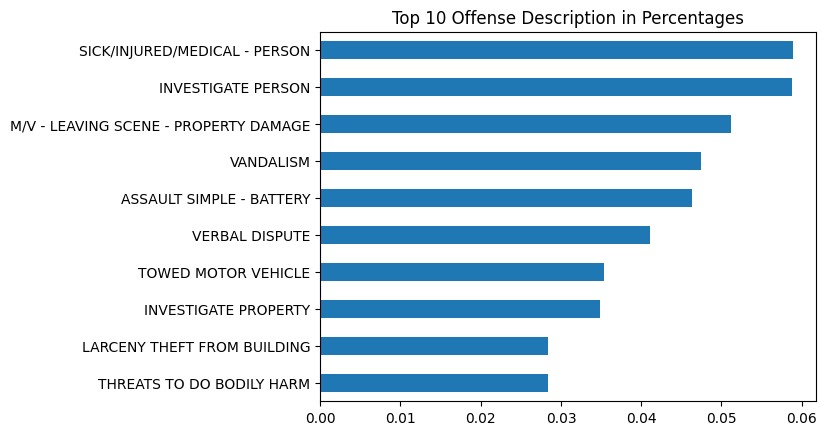

In [27]:
# Converting this into a percentage of the total amount of crimes
# Total amount of crimes

display((offense_desc_vals / crime.shape[0]))

(offense_desc_vals  / crime.shape[0]).sort_values().plot(kind = 'barh')
plt.title("Top 10 Offense Description in Percentages")

# What year had the most crimes committed?

Text(0.5, 1.0, 'Number of Crimes per Year')

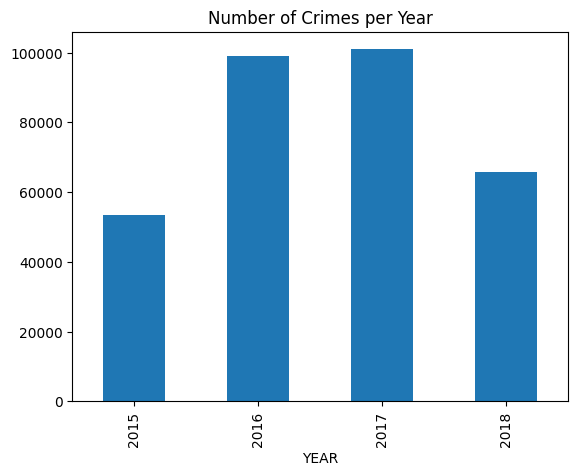

In [28]:
crime.groupby('YEAR').count()['INCIDENT_NUMBER'].plot(kind = 'bar')
plt.title('Number of Crimes per Year')

# What days have the most committed crimes?

DAY_OF_WEEK
Friday       48489
Wednesday    46727
Thursday     46655
Tuesday      46376
Monday       45674
Saturday     44816
Sunday       40313
Name: INCIDENT_NUMBER, dtype: int64

Text(0.5, 1.0, 'Number of Crimes by day')

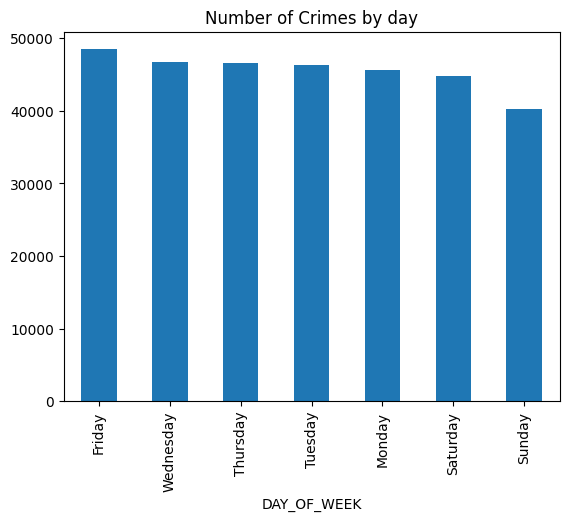

In [29]:
display(crime.groupby('DAY_OF_WEEK').count()['INCIDENT_NUMBER'].sort_values(ascending = False))

crime.groupby('DAY_OF_WEEK').count()['INCIDENT_NUMBER'].sort_values(ascending = False).plot(kind = 'bar')
plt.title('Number of Crimes by day')

# Are there more crimes during specific hours?


HOUR
17    20762
18    20301
16    19870
12    18676
19    17587
14    17189
13    16845
15    16519
11    16445
10    16345
20    15849
0     15106
9     14740
21    14109
8     13042
22    12925
23    10596
1      9267
7      8850
2      7693
6      5026
3      4589
4      3408
5      3311
Name: INCIDENT_NUMBER, dtype: int64

Text(0.5, 1.0, 'Number of Crimes by Hour')

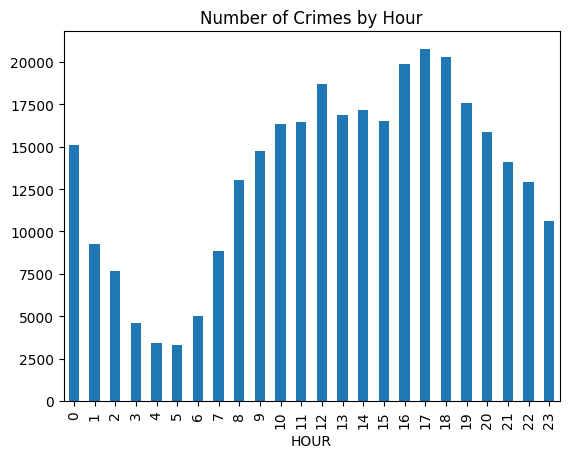

In [30]:
display(crime.groupby('HOUR').count()['INCIDENT_NUMBER'].sort_values(ascending = False))

crime.groupby('HOUR').count()['INCIDENT_NUMBER'].plot(kind = 'bar')
plt.title('Number of Crimes by Hour')

# What days during which hours are the most crimes committed?

In [31]:
crime.groupby(['HOUR', 'DAY_OF_WEEK']).count()['INCIDENT_NUMBER']

HOUR  DAY_OF_WEEK
0     Friday         2161
      Monday         2000
      Saturday       2612
      Sunday         2400
      Thursday       2039
                     ... 
23    Saturday       1951
      Sunday         1380
      Thursday       1492
      Tuesday        1296
      Wednesday      1298
Name: INCIDENT_NUMBER, Length: 168, dtype: int64

In [32]:
# Unstacking the result to turn this into a table
week_and_hour = crime.groupby(['HOUR', 'DAY_OF_WEEK']).count()['INCIDENT_NUMBER'].unstack()
week_and_hour

DAY_OF_WEEK,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
HOUR,,,,,,,
0,2161,2000,2612,2400,2039,1897,1997
1,1275,1058,1855,2043,1077,1017,942
2,952,846,1827,1855,774,641,798
3,532,583,957,1119,526,460,412
4,441,386,672,704,436,399,370
5,485,417,478,517,508,462,444
6,768,709,530,543,866,787,823
7,1398,1352,1078,758,1405,1418,1441
8,2041,2046,1515,1123,2037,2145,2135


In [33]:
# The columns names appear random, so we change the name of the columns in order for them to reflect correct information
week_and_hour = week_and_hour[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]
week_and_hour

DAY_OF_WEEK,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
HOUR,,,,,,,
0,2000,1897,1997,2039,2161,2612,2400
1,1058,1017,942,1077,1275,1855,2043
2,846,641,798,774,952,1827,1855
3,583,460,412,526,532,957,1119
4,386,399,370,436,441,672,704
5,417,462,444,508,485,478,517
6,709,787,823,866,768,530,543
7,1352,1418,1441,1405,1398,1078,758
8,2046,2145,2135,2037,2041,1515,1123


<Axes: xlabel='DAY_OF_WEEK', ylabel='HOUR'>

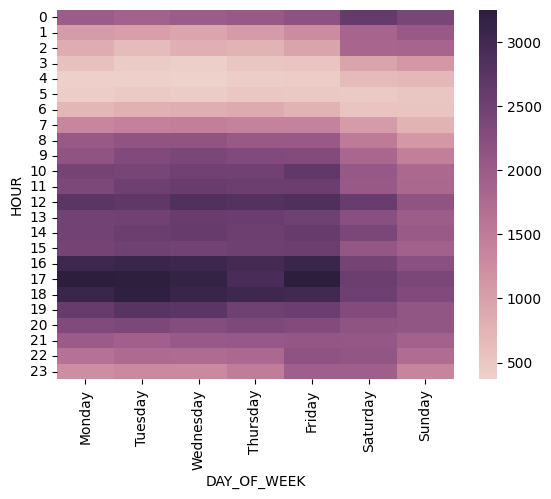

In [34]:
sns.heatmap(week_and_hour, cmap = sns.cubehelix_palette(as_cmap=True))

# In which months were the number of crimes below average?

In [35]:
# We first need to find the average number of crimes
avg_crime = crime.groupby(['YEAR', 'MONTH']).count()['INCIDENT_NUMBER'].mean()
print('The average number of crimes is ' + str(avg_crime))

# We then unstack the data we need
year_and_month = crime.groupby(['MONTH', 'YEAR']).count()['INCIDENT_NUMBER'].unstack()

# Create a function that uses a table to display all the crimes in a year that were less than the average
def style_negative(v, props = ''):
  return props if v < avg_crime else None

s2 = year_and_month.style.applymap(style_negative, props = 'color:darkorange;')\
        .applymap(lambda v: 'opacity: 20%;' if (v < 0.3) and (v > -0.3)
        else None)
s2

The average number of crimes is 7976.25


YEAR,2015,2016,2017,2018
MONTH,,,,
1,nan,7835.000000,7991.000000,7782.000000
2,nan,7307.000000,7408.000000,6937.000000
3,nan,8199.000000,8179.000000,7768.000000
4,nan,8101.000000,8069.000000,7916.000000
5,nan,8578.000000,8715.000000,8906.000000
6,4188.000000,8558.000000,8985.000000,8834.000000
7,8322.000000,8618.000000,9075.000000,8538.000000
8,8340.000000,8938.000000,9206.000000,8337.000000
9,8411.000000,8521.000000,8940.000000,667.000000


# In which months on average did the most crimes occur?

In [36]:
# Lets highlight the highest crime in a year
def highlight_max(s, props = ''):
  return np.where(s == np.nanmax(s.values), props, '')
s2.apply(highlight_max, props = 'color:white; background-color:red', axis = 0)

YEAR,2015,2016,2017,2018
MONTH,,,,
1,nan,7835.000000,7991.000000,7782.000000
2,nan,7307.000000,7408.000000,6937.000000
3,nan,8199.000000,8179.000000,7768.000000
4,nan,8101.000000,8069.000000,7916.000000
5,nan,8578.000000,8715.000000,8906.000000
6,4188.000000,8558.000000,8985.000000,8834.000000
7,8322.000000,8618.000000,9075.000000,8538.000000
8,8340.000000,8938.000000,9206.000000,8337.000000
9,8411.000000,8521.000000,8940.000000,667.000000


# Which Districts were the most crimes committed on a yearly basis?

In [45]:
avg_district_crime = crime.groupby(['DISTRICT', 'YEAR']).count()['INCIDENT_NUMBER'].mean()
print('The average number of crimes is ' + str(avg_district_crime))

district_and_year = crime.groupby(['DISTRICT', 'YEAR']).count()['INCIDENT_NUMBER'].unstack()

def style_negative(v, props = ''):
  return props if v < avg_district_crime else None

t2 = district_and_year.style.applymap(style_negative, props = 'color:blue;')\
        .applymap(lambda v: 'opacity: 20%;' if (v < 0.3) and (v > -0.3)
        else None)

def highlight_max(s, props = ''):
  return np.where(s == np.nanmax(s.values), props, '')
t2.apply(highlight_max, props = 'color:white; background-color:red', axis = 0)

The average number of crimes is 6610.104166666667


YEAR,2015,2016,2017,2018
DISTRICT,,,,
A1,6010,10922,11374,7404
A15,1027,1986,2167,1325
A7,2426,4130,4264,2724
B2,8682,15706,15680,9872
B3,5616,11145,11195,7485
C11,7363,13602,13281,8282
C6,3939,7072,7247,5199
D14,3280,6279,6509,4059
D4,7203,12953,13157,8601


<Axes: xlabel='YEAR', ylabel='DISTRICT'>

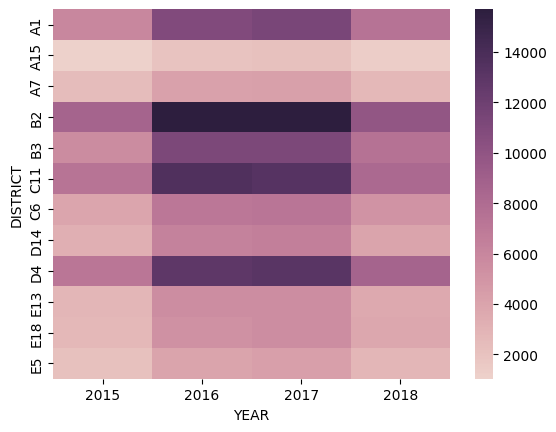

In [44]:
sns.heatmap(district_and_year, cmap = sns.cubehelix_palette(as_cmap = True))